In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob

import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse

In [3]:
only_i_01 = np.array(glob.glob('../data/TargettedTesting/StartLater-ThirdAttempt(HousesLocked)/OnlyI-Targetted_Testing_BeginAt_10_DTR_0.1*.txt'))
only_i_05 = np.array(glob.glob('../data/TargettedTesting/StartLater-ThirdAttempt(HousesLocked)/OnlyI-Targetted_Testing_BeginAt_10_DTR_0.5*.txt'))

In [4]:
def split_begin_rate(files,choice):
    
    begin_at_1 = []
    begin_at_10= []
    
    for file in files:
        if file.split("_")[3] == "1":
            begin_at_1.append(file)
        elif file.split("_")[3] == "10":
            begin_at_10.append(file)
        
    if(choice==1):
        return begin_at_1
    elif(choice==10):
        return begin_at_10
    else:
        print("Invalid choice")

In [5]:
def split_daily_rate(files,choice):
    
    point_one = []
    point_five= []
    
    for file in files:
        if file.split("_")[5] == "0.1":
            point_one.append(file)
        elif file.split("_")[5] == "0.5":
            point_five.append(file)
            
    if(choice==0.1):
        return point_one
    elif(choice==0.5):
        return point_five
    else:
        print("Invalid choice")

In [6]:
def split_rat_frac(all_files,choice):
    
    p_0_0 = []
    p_0_1 = []
    p_0_2 = []
    p_0_3 = []
    p_0_4 = []
    p_0_5 = []
    p_0_6 = []
    p_0_7 = []
    p_0_8 = []
    p_0_9 = []
    p_1_0 = []

    p = [p_0_0, p_0_1, p_0_2, p_0_3, p_0_4, p_0_5, p_0_6, p_0_7, p_0_8, p_0_9, p_1_0]
    x_axis = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    
    index = np.where(x_axis==choice)[0][0]
    
    for i in range(0,len(all_files)):
        for j in range(0,len(x_axis)):
            if(all_files[i].split("_")[8]==str(x_axis[index])):
                p[j].append(all_files[i])
                
    n_pop = 10000
    
    return p[index]    

Text(0, 0.5, 'Relative Fraction of Population')

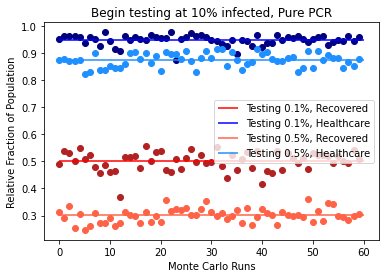

In [7]:
counter = 0
avg_rec = 0
avg_hcw = 0
for fileName in split_rat_frac(only_i_01,0):
    
    n_rec = np.genfromtxt(fileName,delimiter=" ",comments="#")[-1][4]
    
    n_hcw = int(float(np.genfromtxt(fileName,delimiter=",",comments=",",usecols=np.arange(0,-1),dtype=str)[13].split(":")[-1]))
    
    avg_rec += n_rec
    avg_hcw += n_hcw
    
    plt.scatter(counter,n_rec/10000,color='firebrick')
    plt.scatter(counter,n_hcw/429,color='navy')
    counter += 1

avg_rec = avg_rec/counter
avg_hcw = avg_hcw/counter

plt.hlines(avg_rec/10000,0,counter,color='r',label="Testing 0.1%, Recovered")
plt.hlines(avg_hcw/429,0,counter,color='b',label="Testing 0.1%, Healthcare")



counter = 0
avg_rec = 0
avg_hcw = 0
for fileName in split_rat_frac(only_i_05,0):
    
    n_rec = np.genfromtxt(fileName,delimiter=" ",comments="#")[-1][4]
    
    n_hcw = int(float(np.genfromtxt(fileName,delimiter=",",comments=",",usecols=np.arange(0,-1),dtype=str)[13].split(":")[-1]))
    
    avg_rec += n_rec
    avg_hcw += n_hcw
    
    plt.scatter(counter,n_rec/10000,color='tomato')
    plt.scatter(counter,n_hcw/429,color='dodgerblue')
    counter += 1

avg_rec = avg_rec/counter
avg_hcw = avg_hcw/counter

plt.hlines(avg_rec/10000,0,counter,color='tomato',label="Testing 0.5%, Recovered")
plt.hlines(avg_hcw/429,0,counter,color='dodgerblue',label="Testing 0.5%, Healthcare")
plt.legend()
plt.title("Begin testing at 10% infected, Pure PCR")
plt.xlabel("Monte Carlo Runs")
plt.ylabel("Relative Fraction of Population")

Text(0, 0.5, 'Relative Fraction of Population')

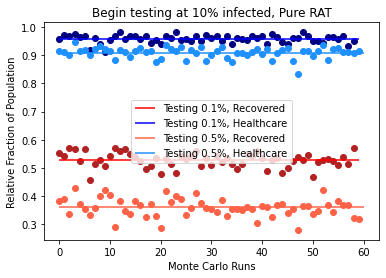

In [14]:
counter = 0
avg_rec = 0
avg_hcw = 0
for fileName in split_rat_frac(only_i_01,1):
    
    n_rec = np.genfromtxt(fileName,delimiter=" ",comments="#")[-1][4]
    
    n_hcw = int(float(np.genfromtxt(fileName,delimiter=",",comments=",",usecols=np.arange(0,-1),dtype=str)[13].split(":")[-1]))
    
    if(n_rec>100):
        avg_rec += n_rec
        avg_hcw += n_hcw

        plt.scatter(counter,n_rec/10000,color='firebrick')
        plt.scatter(counter,n_hcw/429,color='navy')
        counter += 1

avg_rec = avg_rec/counter
avg_hcw = avg_hcw/counter

plt.hlines(avg_rec/10000,0,counter,color='r',label="Testing 0.1%, Recovered")
plt.hlines(avg_hcw/429,0,counter,color='b',label="Testing 0.1%, Healthcare")



counter = 0
avg_rec = 0
avg_hcw = 0
for fileName in split_rat_frac(only_i_05,1):
    
    n_rec = np.genfromtxt(fileName,delimiter=" ",comments="#")[-1][4]
    
    n_hcw = int(float(np.genfromtxt(fileName,delimiter=",",comments=",",usecols=np.arange(0,-1),dtype=str)[13].split(":")[-1]))
    
    if(n_rec>1000):
        avg_rec += n_rec
        avg_hcw += n_hcw

        plt.scatter(counter,n_rec/10000,color='tomato')
        plt.scatter(counter,n_hcw/429,color='dodgerblue')
        counter += 1

avg_rec = avg_rec/counter
avg_hcw = avg_hcw/counter

plt.hlines(avg_rec/10000,0,counter,color='tomato',label="Testing 0.5%, Recovered")
plt.hlines(avg_hcw/429,0,counter,color='dodgerblue',label="Testing 0.5%, Healthcare")
plt.legend()
plt.title("Begin testing at 10% infected, Pure RAT")
plt.xlabel("Monte Carlo Runs")
plt.ylabel("Relative Fraction of Population")

5007.333333333333
406.98333333333335
3013.2833333333333
375.03333333333336


(0.2, 1.0131744755244756)

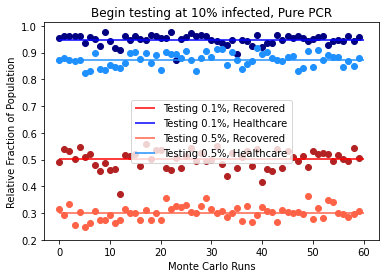

In [21]:
counter = 0
avg_rec = 0
avg_hcw = 0
for fileName in split_rat_frac(only_i_01,0):
    
    n_rec = np.genfromtxt(fileName,delimiter=" ",comments="#")[-1][4]
    
    n_hcw = int(float(np.genfromtxt(fileName,delimiter=",",comments=",",usecols=np.arange(0,-1),dtype=str)[13].split(":")[-1]))
    
    if(n_rec>1000):
        avg_rec += n_rec
        avg_hcw += n_hcw

        plt.scatter(counter,n_rec/10000,color='firebrick')
        plt.scatter(counter,n_hcw/429,color='navy')
        counter += 1

avg_rec = avg_rec/counter
avg_hcw = avg_hcw/counter

plt.hlines(avg_rec/10000,0,counter,color='r',label="Testing 0.1%, Recovered")
plt.hlines(avg_hcw/429,0,counter,color='b',label="Testing 0.1%, Healthcare")

print(avg_rec)
print(avg_hcw)


counter = 0
avg_rec = 0
avg_hcw = 0
for fileName in split_rat_frac(only_i_05,0):
    
    n_rec = np.genfromtxt(fileName,delimiter=" ",comments="#")[-1][4]
    
    n_hcw = int(float(np.genfromtxt(fileName,delimiter=",",comments=",",usecols=np.arange(0,-1),dtype=str)[13].split(":")[-1]))
    
    if(n_rec>1000):
        avg_rec += n_rec
        avg_hcw += n_hcw

        plt.scatter(counter,n_rec/10000,color='tomato')
        plt.scatter(counter,n_hcw/429,color='dodgerblue')
        counter += 1

avg_rec = avg_rec/counter
avg_hcw = avg_hcw/counter

plt.hlines(avg_rec/10000,0,counter,color='tomato',label="Testing 0.5%, Recovered")
plt.hlines(avg_hcw/429,0,counter,color='dodgerblue',label="Testing 0.5%, Healthcare")
plt.legend()
plt.title("Begin testing at 10% infected, Pure PCR")
plt.xlabel("Monte Carlo Runs")
plt.ylabel("Relative Fraction of Population")

print(avg_rec)
print(avg_hcw)
plt.ylim(0.2)

(0.2, 1.0302895804195804)

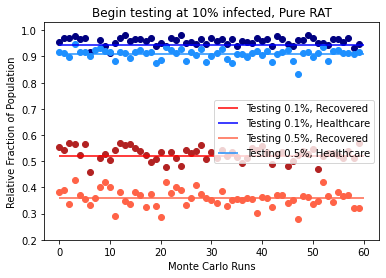

In [22]:
counter = 0
avg_rec = 0
avg_hcw = 0
for fileName in split_rat_frac(only_i_01,1):
    
    n_rec = np.genfromtxt(fileName,delimiter=" ",comments="#")[-1][4]
    
    n_hcw = int(float(np.genfromtxt(fileName,delimiter=",",comments=",",usecols=np.arange(0,-1),dtype=str)[13].split(":")[-1]))
    
    avg_rec += n_rec
    avg_hcw += n_hcw
    
    plt.scatter(counter,n_rec/10000,color='firebrick')
    plt.scatter(counter,n_hcw/429,color='navy')
    counter += 1

avg_rec = avg_rec/counter
avg_hcw = avg_hcw/counter

plt.hlines(avg_rec/10000,0,counter,color='r',label="Testing 0.1%, Recovered")
plt.hlines(avg_hcw/429,0,counter,color='b',label="Testing 0.1%, Healthcare")



counter = 0
avg_rec = 0
avg_hcw = 0
for fileName in split_rat_frac(only_i_05,1):
    
    n_rec = np.genfromtxt(fileName,delimiter=" ",comments="#")[-1][4]
    
    n_hcw = int(float(np.genfromtxt(fileName,delimiter=",",comments=",",usecols=np.arange(0,-1),dtype=str)[13].split(":")[-1]))
    
    if(n_rec>1000):
        avg_rec += n_rec
        avg_hcw += n_hcw

        plt.scatter(counter,n_rec/10000,color='tomato')
        plt.scatter(counter,n_hcw/429,color='dodgerblue')
        counter += 1

avg_rec = avg_rec/counter
avg_hcw = avg_hcw/counter

plt.hlines(avg_rec/10000,0,counter,color='tomato',label="Testing 0.5%, Recovered")
plt.hlines(avg_hcw/429,0,counter,color='dodgerblue',label="Testing 0.5%, Healthcare")
plt.legend()
plt.title("Begin testing at 10% infected, Pure RAT")
plt.xlabel("Monte Carlo Runs")
plt.ylabel("Relative Fraction of Population")
plt.ylim(0.2)